In [3]:
import streamlit as st
from streamlit.logger import get_logger
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

hui_training = pd.read_csv('trainings_data.csv',delimiter=';')
hui_training['Number of Practices'] = hui_training.iloc[:,2:].sum(axis=1)
hui_training.rename(columns={'Color':'Player Group'},inplace=True)
hui_training.index.name = 'Player'  


In [12]:




hui_training

,Name,Player Group,1,2,3,4,5,6,7,8,...,75,76,77,78,79,80,81,82,83,Number of Practices
Player,,,,,,,,,,,,,,,,,,,,,
0,Anton Padek Rasmussen,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,37.0
1,Arthur Phillipsen,Blue,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,NaN,0.0,1.0,1.0,53.0
2,Christian Thougaard Jensen,Blue,1.0,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,36.0
3,Edward Harald Jønck-Kejser,Blue,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,33.0
4,Erik Egebo,Blue,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,23.0
5,Holger Sigvardt,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,44.0
6,Jamie Egger Tapie,Blue,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,...,1.0,0.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,35.0
7,Lucas Romano Kemp,Blue,NaN,1.0,NaN,NaN,1.0,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,44.0
8,Max Friis,Blue,0.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,55.0


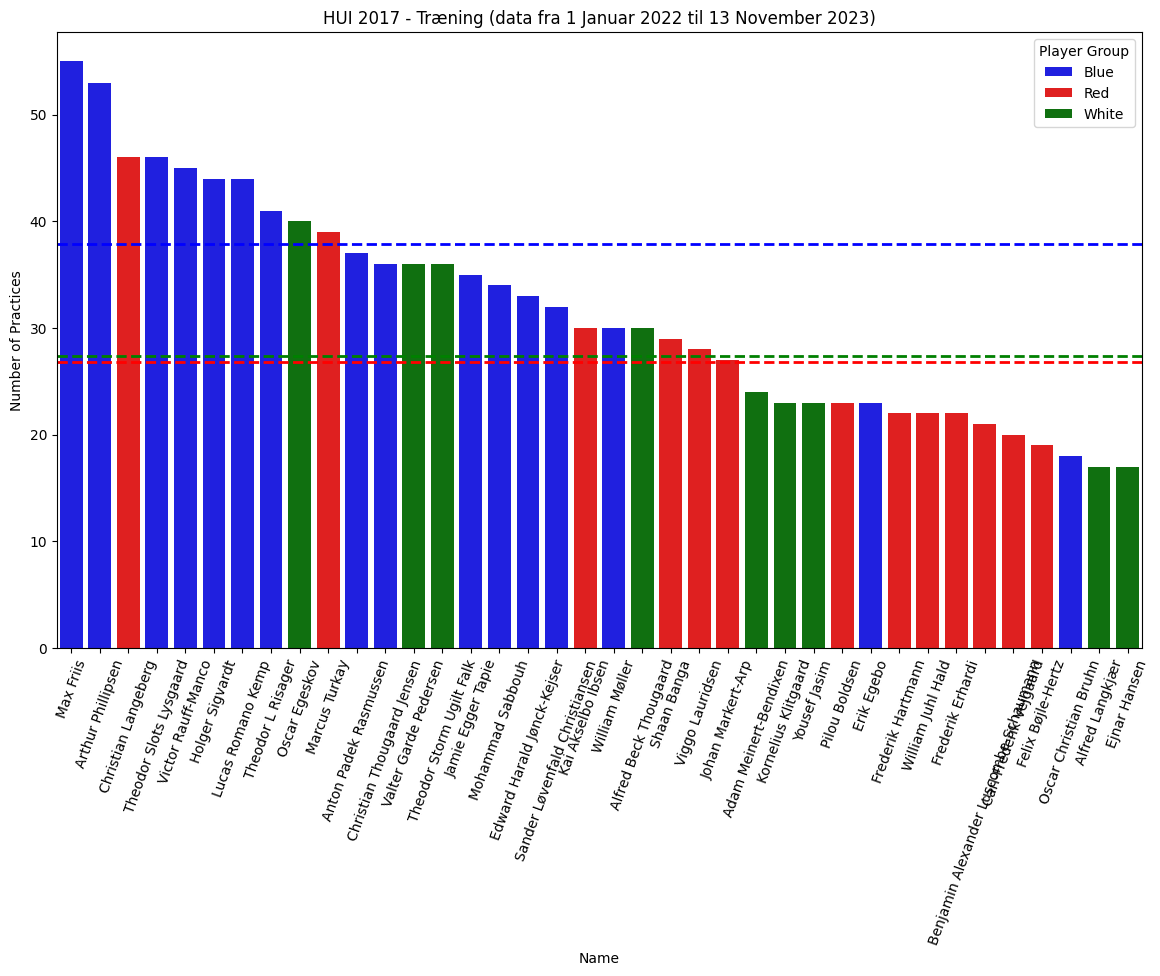

In [8]:



hui_match = pd.read_csv('match_played.csv',delimiter=';')
hui_match['Number of Matches'] = hui_match.iloc[:,2:].sum(axis=1)
hui_match['Player'] = [i for i in np.arange(hui_match.shape[0])]
hui_match.rename(columns={'Color':'Player Group'},inplace=True)

hui_match.sort_values(['Number of Matches'],ascending=False)


In [ ]:

train_order = ['Name', 'Player Group','Number of Practices','Player']
custom_palette = {"Blue": "blue", "White": "green", "Red": "red"}
  
hui_temp = hui_training[hui_training['Number of Practices'] > 15]

fig, ax = plt.subplots(figsize=(14, 8)) 
ax = sns.barplot(x='Name',  y="Number of Practices", data=hui_temp.sort_values(['Number of Practices'],ascending=False), hue='Player Group', palette=custom_palette, ax=ax)
ax.set_title('HUI 2017 - Træning (data fra 1 Januar 2022 til 13 November 2023)')
ax.tick_params(axis='x', rotation=70) 
  
  # Calculate and add mean lines for each group

group_means = hui_temp.groupby('Player Group')['Number of Practices'].mean()
for i, mean in group_means.items():
      ax.axhline(group_means.loc[i], color=custom_palette[i], linestyle='dashed', linewidth=2)
